# Data Analyst task

## Instructions

- The data is provided in the .csv file ./data/data_analyst_task_dataset.csv
- You should return this notebook with your code and explanation on what you're doing and why.
- Perform any analysis you think should be applied and write down any question you think the dataset can answer
- The document has several cells to define the basic sections of the task that we want you to complete:
  - Create any cell you need just please write your code in the appropiate section.
  - If you feel you need to create a new section feel free to do it, just use markdown to give it a name
- Comment your code.


## Data Cleaning
Clean the data to extract significant statistics to identify key information.

#### 1. Are there any columns that are combination of other columns? If so, which ones?

Yes, there is a column that is the combination of others, the column is `title`, which is the combination of `dayId`, `country` and `type`. [See code here](#data_cleaning_1)

#### 2. Are there duplicates of any kind?

No, there aren't any duplicated rows. [See code here](#data_cleaning_2)

## Data Analysis

#### 1. For which countries, if any, are there significant differences between the columns dayId and date?

In the case of the USA, there is a difference of 1 day between `dayId` and `date` in 978 rows, specifically between rows 72150 (included) and 73127 (included).
The difference in all cases is 1 day, being `date` 1 day ahead of `dayId`. [See code here](#data_analysis_1)

#### 2. Do the keywords correlate in any way with the traffic?

Based on the analysis, I conclude that there is no correlation between keywords and traffic, as the most used keywords in the news do not correspond to the keywords with the highest traffic. [See code here](#data_analysis_2)

# Tools Preparation

In [1]:
# Import all the tools: Pandas, NumPy, Plotly and Matplotlib.

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='svg'

%matplotlib inline

<a id='data_cleaning_1'></a>

# Data Cleaning

In [2]:
# Import the dataset and store it into the 'df_news' DataFrame variable, and parse 'dayId' and 'date' columns.
df_news = pd.read_csv('data_analyst_task_dataset.csv', 
                low_memory=False, 
                parse_dates=['dayId', 'date'])

# Rename the 'name' column to 'keywords' for better understanding, and call the variable to display the DataFrame.
df_news.rename(columns={'name': 'keywords'}, inplace=True)
df_news

,dayId,country,type,title,date,keywords,traffic,publishDate,relatedKeyword,newsTitle,newsSource,newsSnippet,newsLink
0,2016-11-28,Argentina,Top Keywords,Top Keywords Argentina 20161128,2016-11-28,Agustin Pappa,"2,000+","Mon, 28 Nov 2016 20:00:00 -0300",NaN,"Así le robaron a Agustín Pappa, el ex particip...",Online-911 (Comunicado de prensa),"La víctima del robo fue Agustín Pappa (20), un...",http://www.online-911.com/2016/11/robaron-agus...
1,2016-11-28,Argentina,Top Keywords,Top Keywords Argentina 20161128,2016-11-28,Feriado 28 Noviembre,"20,000+","Mon, 28 Nov 2016 02:00:00 -0300",Porque Es Feriado El 28 De Noviembre,¿Por qué este lunes se celebra el Día de la So...,Minutouno.com,La conmemoración fue propuesta por el historia...,http://www.minutouno.com/notas/1523245-por-que...
2,2016-11-28,Argentina,Top Keywords,Top Keywords Argentina 20161128,2016-11-28,Gisela Berger,"10,000+","Mon, 28 Nov 2016 13:00:00 -0300",NaN,"Quién es Gisela Berger, la sensual rubia que b...",TN.com.ar,"Daniel Scioli apareció en Punta Cana, bailando...",http://tn.com.ar/show/basicas/quien-es-gisela-...
3,2016-11-28,Argentina,Top Keywords,Top Keywords Argentina 20161128,2016-11-28,Guillermo Salatino,"2,000+","Mon, 28 Nov 2016 19:00:00 -0300",NaN,"A los 71 años, el periodista Guillermo Salatin...",canchallena.com,"En sus 40 años como periodista de tenis, Guill...",http://www.lanacion.com.ar/1960412-copa-davis-...
4,2016-11-28,Argentina,Top Keywords,Top Keywords Argentina 20161128,2016-11-28,Leo Mayer,"2,000+","Mon, 28 Nov 2016 01:00:00 -0300",NaN,"Del Potro, Delbonis y Mayer podrían dar la vue...",La Gaceta Tucumán,"Juan Martín Del Potro, Federico Delbonis y ""Le...",http://www.lagaceta.com.ar/nota/709451/deporte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75776,2017-05-04,Spain,Top Keywords,Top Keywords Spain 20170504,2017-05-04,No Va Whatsapp,"5,000+","Thu, 04 May 2017 00:00:00 +0200",NaN,NaN,NaN,NaN,NaN
75777,2017-05-04,Spain,Top Keywords,Top Keywords Spain 20170504,2017-05-04,Que Pasa Con Whatsapp,"5,000+","Thu, 04 May 2017 01:00:00 +0200",NaN,NaN,NaN,NaN,NaN
75778,2017-05-04,Spain,Top Keywords,Top Keywords Spain 20170504,2017-05-04,Reina de Inglaterra,"50,000+","Thu, 04 May 2017 09:00:00 +0200","Buckingham Palace, Isabel II, Felipe de Edimbu...",NaN,NaN,NaN,NaN
75779,2017-05-04,Spain,Top Keywords,Top Keywords Spain 20170504,2017-05-04,Rosario Flores,"10,000+","Thu, 04 May 2017 01:00:00 +0200",NaN,NaN,NaN,NaN,NaN


In [3]:
# Check the type of every column to better understand the type of data I'm working with
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75781 entries, 0 to 75780
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dayId           75781 non-null  datetime64[ns]
 1   country         75781 non-null  object        
 2   type            75781 non-null  object        
 3   title           75781 non-null  object        
 4   date            75781 non-null  datetime64[ns]
 5   keywords        75781 non-null  object        
 6   traffic         75781 non-null  object        
 7   publishDate     75781 non-null  object        
 8   relatedKeyword  17677 non-null  object        
 9   newsTitle       74225 non-null  object        
 10  newsSource      74225 non-null  object        
 11  newsSnippet     74222 non-null  object        
 12  newsLink        74225 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 7.5+ MB


<a id='data_cleaning_2'></a>

In [4]:
# Check for duplicate values (Question No. 2 - Data Cleaning)
df_news.duplicated().any()

False

In [5]:
# Check for missing values and sum them by column to get a better insight of which columns it's relevant to work with.
df_news.isna().sum()

dayId                 0
country               0
type                  0
title                 0
date                  0
keywords              0
traffic               0
publishDate           0
relatedKeyword    58104
newsTitle          1556
newsSource         1556
newsSnippet        1559
newsLink           1556
dtype: int64

<a id='data_analysis_1'></a>

# Data Analysis

## Check if there are differences between 'dayId' and 'date'

In [6]:
# Create a variable to check for differences between the columns 'dayId' and 'date'.
is_dayId_equal_date_list = (df_news["dayId"] == df_news["date"])
is_dayId_equal_date_list

0        True
1        True
2        True
3        True
4        True
         ... 
75776    True
75777    True
75778    True
75779    True
75780    True
Length: 75781, dtype: bool

In [7]:
# Find all the indexes where 'dayId' and 'date' are different since in 'is_dayId_equal_date_list' it wasn't observable.
not_equal_indexes_list = []
for i, item in enumerate(is_dayId_equal_date_list):
    if item == False:
        not_equal_indexes_list.append(i)
print(not_equal_indexes_list)

[72150, 72151, 72152, 72153, 72154, 72155, 72156, 72157, 72158, 72159, 72160, 72161, 72162, 72163, 72164, 72165, 72166, 72167, 72168, 72169, 72170, 72171, 72172, 72173, 72174, 72175, 72176, 72177, 72178, 72179, 72180, 72181, 72182, 72183, 72184, 72185, 72186, 72187, 72188, 72189, 72190, 72191, 72192, 72193, 72194, 72195, 72196, 72197, 72198, 72199, 72200, 72201, 72202, 72203, 72204, 72205, 72206, 72207, 72208, 72209, 72210, 72211, 72212, 72213, 72214, 72215, 72216, 72217, 72218, 72219, 72220, 72221, 72222, 72223, 72224, 72225, 72226, 72227, 72228, 72229, 72230, 72231, 72232, 72233, 72234, 72235, 72236, 72237, 72238, 72239, 72240, 72241, 72242, 72243, 72244, 72245, 72246, 72247, 72248, 72249, 72250, 72251, 72252, 72253, 72254, 72255, 72256, 72257, 72258, 72259, 72260, 72261, 72262, 72263, 72264, 72265, 72266, 72267, 72268, 72269, 72270, 72271, 72272, 72273, 72274, 72275, 72276, 72277, 72278, 72279, 72280, 72281, 72282, 72283, 72284, 72285, 72286, 72287, 72288, 72289, 72290, 72291, 72292

In [8]:
# Check the non equal rows in the DataFrame to see the difference. 
df_news.iloc[72150:73128]

,dayId,country,type,title,date,keywords,traffic,publishDate,relatedKeyword,newsTitle,newsSource,newsSnippet,newsLink
72150,2017-03-12,USA,Top Keywords,Top Keywords USA 20170312,2017-03-13,Baby Driver,"20,000+","Sun, 12 Mar 2017 20:00:00 -0700",NaN,Edgar Wright's 'Baby Driver' is an action-musi...,Los Angeles Times,Starring Ansel Elgort as a young heist driver ...,http://www.latimes.com/entertainment/movies/la...
72151,2017-03-12,USA,Top Keywords,Top Keywords USA 20170312,2017-03-13,Bracketology,"200,000+","Sun, 12 Mar 2017 15:00:00 -0700",Cbs Sports,Bracketology: Selection Sunday upsets could re...,CBSSports.com,The almost-final projected bracket is now post...,http://www.cbssports.com/college-basketball/ne...
72152,2017-03-12,USA,Top Keywords,Top Keywords USA 20170312,2017-03-13,Capital Weather Gang,"50,000+","Sun, 12 Mar 2017 19:00:00 -0700",Weather Dc,Live blogging the latest on a heavy snow threa...,Washington Post (blog),Roughly 100 million people are under winter we...,https://www.washingtonpost.com/news/capital-we...
72153,2017-03-12,USA,Top Keywords,Top Keywords USA 20170312,2017-03-13,Chicago Weather,"50,000+","Sun, 12 Mar 2017 21:00:00 -0700",NaN,"Wintry week ahead, then weather turns milder",Chicago Tribune,As this system passes well south of Chicago on...,http://www.chicagotribune.com/news/weather/ct-...
72154,2017-03-12,USA,Top Keywords,Top Keywords USA 20170312,2017-03-13,Colton Haynes,"100,000+","Sun, 12 Mar 2017 15:00:00 -0700",Jeff Leatham,Colton Haynes and Jeff Leatham are engaged — a...,USA TODAY,"Cher's got you covered, babe. She helped pop t...",http://www.usatoday.com/story/life/people/2017...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73123,2017-05-03,USA,Top Keywords,Top Keywords USA 20170503,2017-05-04,Sophie Brussaux,"100,000+","Wed, 03 May 2017 15:00:00 -0700",NaN,Former Adult Film Star Sophie Brussaux Says Sh...,Oxygen (blog),You probably saw the headlines last month abou...,http://www.oxygen.com/very-real/former-adult-f...
73124,2017-05-03,USA,Top Keywords,Top Keywords USA 20170503,2017-05-04,Spurs,"200,000+","Wed, 03 May 2017 21:00:00 -0700","Tony Parker, Spurs Game, Kawhi Leonard",The San Antonio Spurs have a bigger problem th...,FOXSports.com,The Spurs need Leonard to carry them on offens...,http://www.foxsports.com/nba/gallery/san-anton...
73125,2017-05-03,USA,Top Keywords,Top Keywords USA 20170503,2017-05-04,Sunny Co Clothing,"200,000+","Wed, 03 May 2017 12:00:00 -0700",NaN,Here's Why the Internet Is Flipping Out About ...,E! Online,The deal was described as follows: Within 24 h...,http://www.eonline.com/news/848307/here-s-why-...
73126,2017-05-03,USA,Top Keywords,Top Keywords USA 20170503,2017-05-04,The Dark Tower,"200,000+","Wed, 03 May 2017 07:00:00 -0700","Dark Tower trailer, Dark Tower, The Dark Tower...",'The Dark Tower': What You Need to Know,New York Times,"Oh, “The Dark Tower.” What many loyal readers ...",https://www.nytimes.com/2017/05/03/movies/what...


In [9]:
# Create a new DataFrame with only the rows where 'dayId' and 'date' are not equal
df_with_different_dates = df_news[72150:73128]

In [10]:
# Check which countries are in the new DataFrame.
df_with_different_dates.country.value_counts()

USA    978
Name: country, dtype: int64

In [11]:
# Check the difference between 'dayId' and 'date' in days performing a subtraction.
(df_with_different_dates.dayId - df_with_different_dates.date).value_counts() 

-1 days    978
dtype: int64

<a id='data_analysis_2'></a>

## Check for correlation between keywords and traffic

In [12]:
# Create a copy of the original DataDrame to be able to manipulate the copy, and conserve the original 
df_news_temp = df_news.copy()

In [13]:
# Check the values in the 'traffic' column to find out how many times each one appears.
df_news.traffic.value_counts()

2,000+         17154
5,000+         14368
10,000+        12962
1,000+         12012
20,000+        10551
50,000+         4400
100,000+        2272
200,000+        1320
500,000+         412
1,000,000+       194
2,000,000+       107
5,000,000+        22
10,000,000+        7
Name: traffic, dtype: int64

In [14]:
# Replace the 'traffic' column values into integers to be able to sum them.
df_news_temp.traffic.replace({'1,000+':1000, 
                                 '2,000+':2000, 
                                 '5,000+':5000, 
                                 '10,000+':10000, 
                                 '20,000+':20000,   
                                 '50,000+':50000,   
                                 '100,000+':100000,    
                                 '200,000+':200000,    
                                 '500,000+':500000,     
                                 '1,000,000+':1000000,     
                                 '2,000,000+':2000000,    
                                 '5,000,000+':5000000,     
                                 '10,000,000+':10000000}, inplace=True)

In [15]:
# Convert all 'keywords' values to upper case to standardise the results
df_news_temp.keywords = df_news_temp.keywords.str.upper()

In [16]:
# Create a dictionary with the most used keywords in the entire dataset and the number of times they have been used
most_used_keywords = dict(df_news_temp.keywords.value_counts().head(20))
most_used_keywords

{'REAL MADRID': 513,
 'MANCHESTER UNITED': 296,
 'BARCELONA': 232,
 'CHELSEA': 215,
 'ARSENAL': 195,
 'FC BARCELONA': 195,
 'PREMIER LEAGUE': 159,
 'LIVERPOOL': 150,
 'CHAMPIONS LEAGUE': 138,
 'EUROPA LEAGUE': 110,
 'JUVENTUS': 104,
 'ED SHEERAN': 92,
 'MANCHESTER UNITED F.C.': 85,
 'IVANKA TRUMP': 78,
 'SCARLETT JOHANSSON': 78,
 'LA LIGA': 71,
 'CNN': 67,
 'MANCHESTER CITY': 67,
 'CARRIE FISHER': 66,
 'FA CUP': 65}

In [17]:
# Calculate the mean of all the times the most used keywords have been used
most_used_keywords_mean = sum(most_used_keywords.values()) / len(most_used_keywords)
most_used_keywords_mean

148.8

In [18]:
# Calculate the traffic per the top 20 most used keywords and call the variable to check the results
top20_most_used_keywords = list(most_used_keywords.keys())
keywords_per_traffic = dict(df_news_temp.groupby(['keywords'])['traffic'].sum())
traffic_per_most_used_keywords = {}
for keyword in top20_most_used_keywords:
    if keywords_per_traffic[keyword]:
        traffic_per_most_used_keywords[keyword] = keywords_per_traffic[keyword]

        
traffic_per_most_used_keywords

{'REAL MADRID': 15451000,
 'MANCHESTER UNITED': 4570000,
 'BARCELONA': 6179000,
 'CHELSEA': 3378000,
 'ARSENAL': 3054000,
 'FC BARCELONA': 2625000,
 'PREMIER LEAGUE': 2694000,
 'LIVERPOOL': 2674000,
 'CHAMPIONS LEAGUE': 2531000,
 'EUROPA LEAGUE': 1839000,
 'JUVENTUS': 1087000,
 'ED SHEERAN': 1576000,
 'MANCHESTER UNITED F.C.': 509000,
 'IVANKA TRUMP': 998000,
 'SCARLETT JOHANSSON': 739000,
 'LA LIGA': 367000,
 'CNN': 1687000,
 'MANCHESTER CITY': 947000,
 'CARRIE FISHER': 7400000,
 'FA CUP': 680000}

In [19]:
# Calculate the traffic mean of all the values of the most used keywords
most_used_keywords_traffic_mean = sum(traffic_per_most_used_keywords.values()) / len(traffic_per_most_used_keywords)
most_used_keywords_traffic_mean

3049250.0

In [20]:
# Create a variable with the top 20 keywords with highest traffic in the entire dataset.
keywords_highest_traffic = df_news_temp.groupby(['keywords'])['traffic'].sum()
keywords_highest_traffic_sorted = dict(keywords_highest_traffic.sort_values(ascending=False).head(20))
keywords_highest_traffic_sorted

{'GEORGE MICHAEL': 22212000,
 'REAL MADRID': 15451000,
 'LOUISA MAY ALCOTT': 14761000,
 'ESTHER AFUA OCLOO': 14143000,
 'BILL PAXTON': 13099000,
 'CHAPECOENSE': 12419000,
 'SANDFORD FLEMING': 11818000,
 'OSCARS 2017': 11501000,
 'TIS THE SEASON!': 10122000,
 'FRED KOREMATSU': 10043000,
 'DOODLE 4 GOOGLE': 10015000,
 'CHARLES MACINTOSH CHEMIST': 9207000,
 'NEW YEARS EVE DAY': 9020000,
 'FIRST EXPEDITION TO THE SOUTH POLE': 8757000,
 'EXOPLANET DISCOVERY': 8200000,
 'CARRIE FISHER': 7400000,
 'JAGDISH CHANDRA BOSE': 6772000,
 'BESSIE COLEMAN': 6687000,
 'SERGEI DIAGHILEV': 6672000,
 'DALLAS COWBOYS': 6251000}

In [21]:
# Calculate the traffic mean of all the values of the keywords with the highest traffic
keywords_highest_traffic_sorted_mean = sum(keywords_highest_traffic_sorted.values()) / len(keywords_highest_traffic_sorted)
keywords_highest_traffic_sorted_mean 

10727500.0

In [22]:
# Create a variable with the number of time the keywords with higest traffic has been used.
highest_traffic_keywords_list = list(keywords_highest_traffic_sorted.keys())
times_used_keywords_highest_traffic = df_news_temp.keywords.value_counts()[highest_traffic_keywords_list]
times_used_keywords_highest_traffic

GEORGE MICHAEL                         56
REAL MADRID                           513
LOUISA MAY ALCOTT                      19
ESTHER AFUA OCLOO                      13
BILL PAXTON                            32
CHAPECOENSE                            43
SANDFORD FLEMING                       15
OSCARS 2017                            29
TIS THE SEASON!                        12
FRED KOREMATSU                          6
DOODLE 4 GOOGLE                         3
CHARLES MACINTOSH CHEMIST               7
NEW YEARS EVE DAY                      11
FIRST EXPEDITION TO THE SOUTH POLE      8
EXOPLANET DISCOVERY                     8
CARRIE FISHER                          66
JAGDISH CHANDRA BOSE                    9
BESSIE COLEMAN                         16
SERGEI DIAGHILEV                       16
DALLAS COWBOYS                          9
Name: keywords, dtype: int64

In [23]:
# Calculate the mean of all the times the keywords with highest traffic have been used
times_used_keywords_highest_traffic_mean = sum(times_used_keywords_highest_traffic / len(times_used_keywords_highest_traffic))
times_used_keywords_highest_traffic_mean

44.54999999999999

In [24]:
# Check if there are keywords that are in both 'most_used_keywords' and 'keywords_highest_traffic_sorted' dictionaries.
most_used_keywords_set = set(most_used_keywords)
keywords_highest_traffic_set = set(keywords_highest_traffic_sorted)
print(most_used_keywords_set.intersection(keywords_highest_traffic_set))

{'CARRIE FISHER', 'REAL MADRID'}


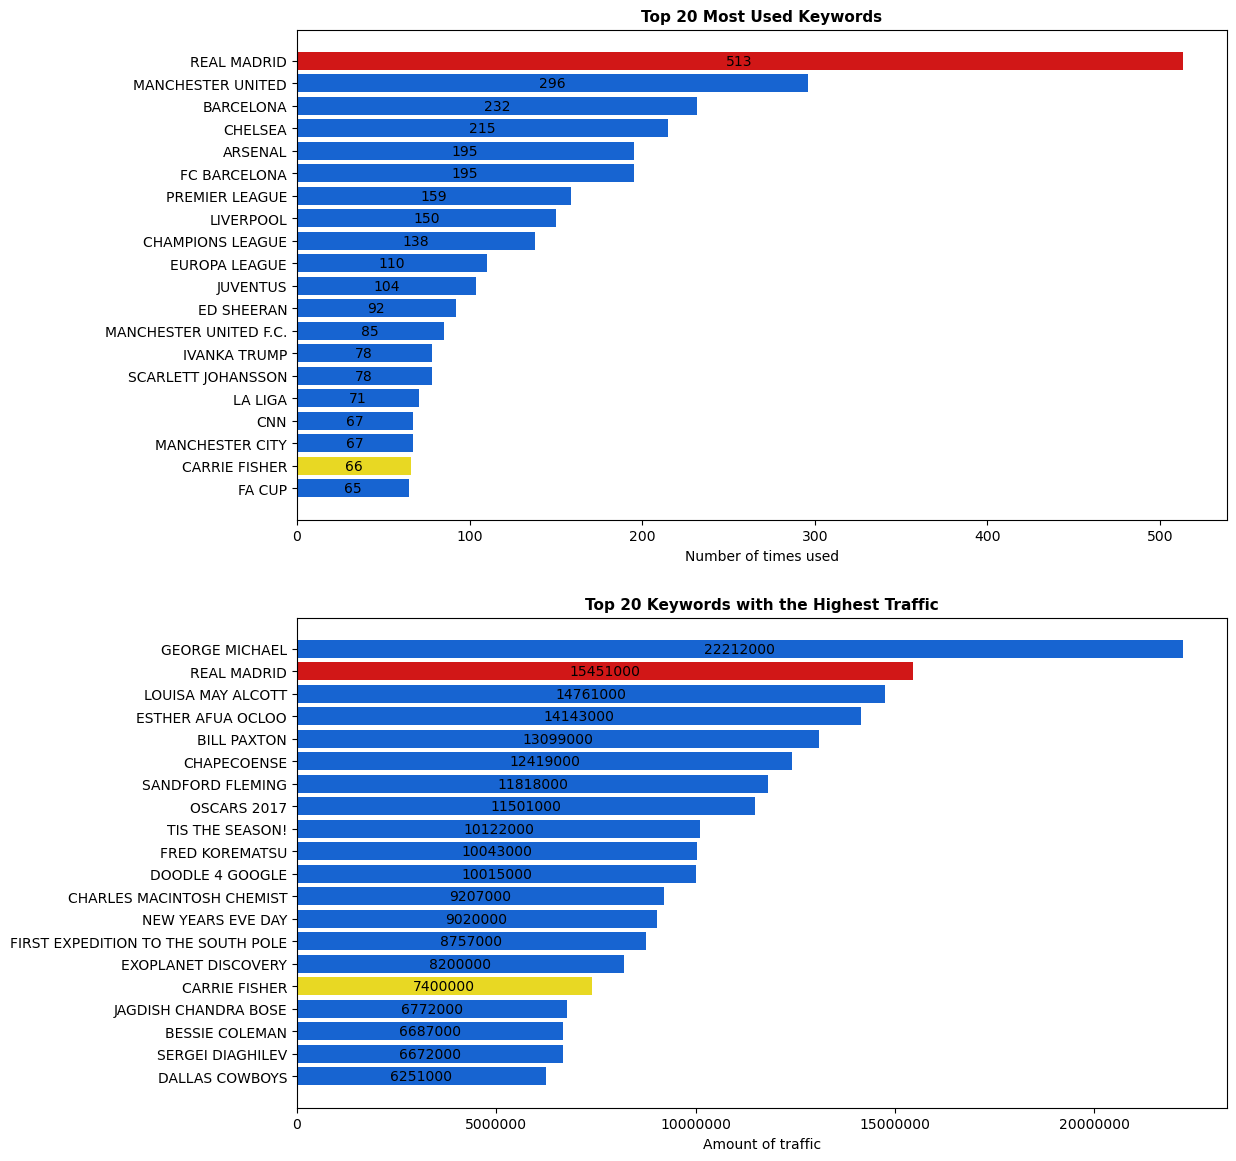

In [25]:
# Create two subplots to visualise the difference between the top 20 most used keywords and the top 20 keywords with the highest traffic.
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(12, 14))

colors=['#d11717', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#e8d823', '#1764d1']
colors2=['#1764d1', '#d11717', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#e8d823', '#1764d1', '#1764d1', '#1764d1', '#1764d1']

# Plot the data to each axis and add colors, titles and lables
ax1.barh(*zip(*most_used_keywords.items()));
ax1.invert_yaxis()
ax1.bar_label(ax1.containers[0], 
              label_type='center')
ax1.set_title('Top 20 Most Used Keywords', 
              fontweight='bold', 
              fontsize=11)
ax1.set_xlabel('Number of times used')
for patch,color in zip(ax1.patches,colors):
    patch.set_facecolor(color)


ax2.barh(*zip(*keywords_highest_traffic_sorted.items()));
ax2.invert_yaxis();
ax2.bar_label(ax2.containers[0], 
              label_type='center', 
              fmt = '%d');
ax2.set_title('Top 20 Keywords with the Highest Traffic', 
              fontweight='bold', 
              fontsize=11)
ax2.set_xlabel('Amount of traffic')
plt.ticklabel_format(style='plain', 
                     axis='x')
for patch,color in zip(ax2.patches,colors2):
    patch.set_facecolor(color)

### Graphs Analysis

By looking at this first exploration, there is no correlation between Keywords and traffic since **the keywords that appear as the most used in the news are not the ones that have more traffic in total**, except for **REAL MADRID** and **CARRIE FISHER**, which appear both in the top 20 most used keywords and in the top 20 keywords with the highest traffic.

## Compare the traffic of the top 20 most used keywords and the top 20 keywords with the highest traffic

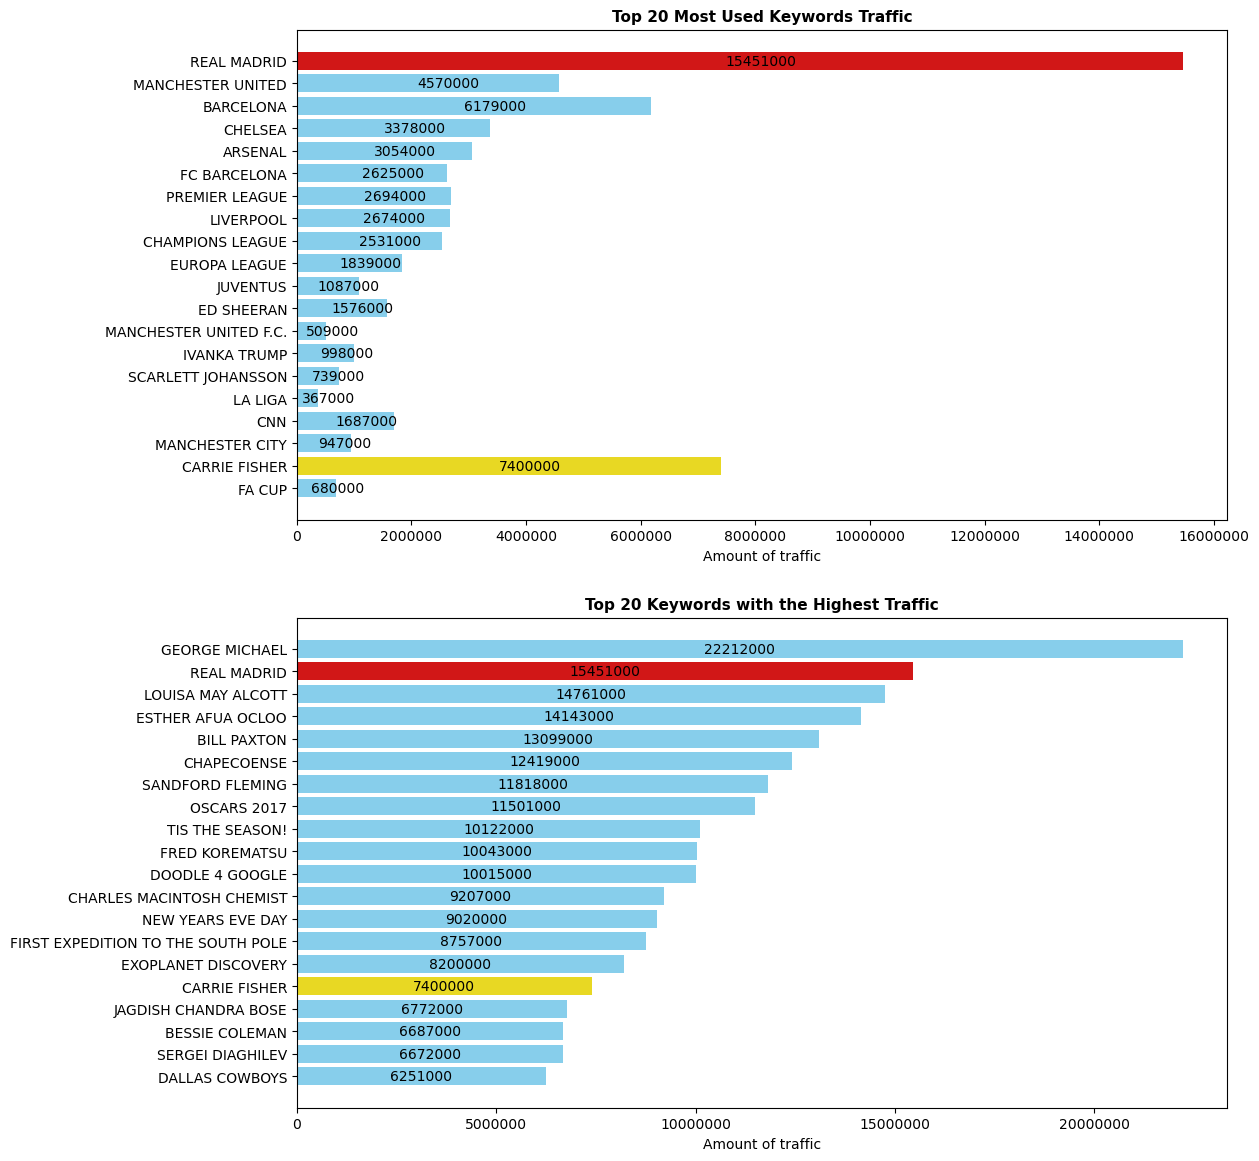

In [26]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(12, 14))

colors=['#d11717', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#e8d823', '#87CEEB']
colors2=['#87CEEB', '#d11717', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#e8d823', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB']

# Plot the data to each axis and add colors, titles and lables
ax1.barh(*zip(*traffic_per_most_used_keywords.items()), 
         color='#87CEEB');
ax1.invert_yaxis();
ax1.bar_label(ax1.containers[0], 
              label_type='center', 
              fmt= '%d', 
              padding= 15);
ax1.set_title('Top 20 Most Used Keywords Traffic', 
              fontweight='bold', 
              fontsize=11)
ax1.set_xlabel('Amount of traffic')
ax1.ticklabel_format(style='plain', 
                     axis='x')
for patch,color in zip(ax1.patches,colors):
    patch.set_facecolor(color)

    
ax2.barh(*zip(*keywords_highest_traffic_sorted.items()), 
         color='#87CEEB');
ax2.invert_yaxis();
ax2.bar_label(ax2.containers[0], 
              label_type='center', 
              fmt= '%d');
ax2.set_title('Top 20 Keywords with the Highest Traffic', 
              fontweight='bold', 
              fontsize=11)
ax2.set_xlabel('Amount of traffic')
ax2.ticklabel_format(style='plain', 
                     axis='x')
for patch,color in zip(ax2.patches,colors2):
    patch.set_facecolor(color)

### Graphs Analysis

These two graphs show that of the top 20 most used keywords, none reaches more than 10.000.000 in total traffic, except for **REAL MADRID**. The average traffic value of the top 20 most used keywords is 3.049.250. On the contrary, in the case of the top 20 keywords with the highest traffic in the entire DataFrame, more than half exceed 10.000.000 in total traffic and the average value is 10.727.500.

## Compare the use of the top 20 most used keywords and the use of the top 20 keywords with the highest traffic

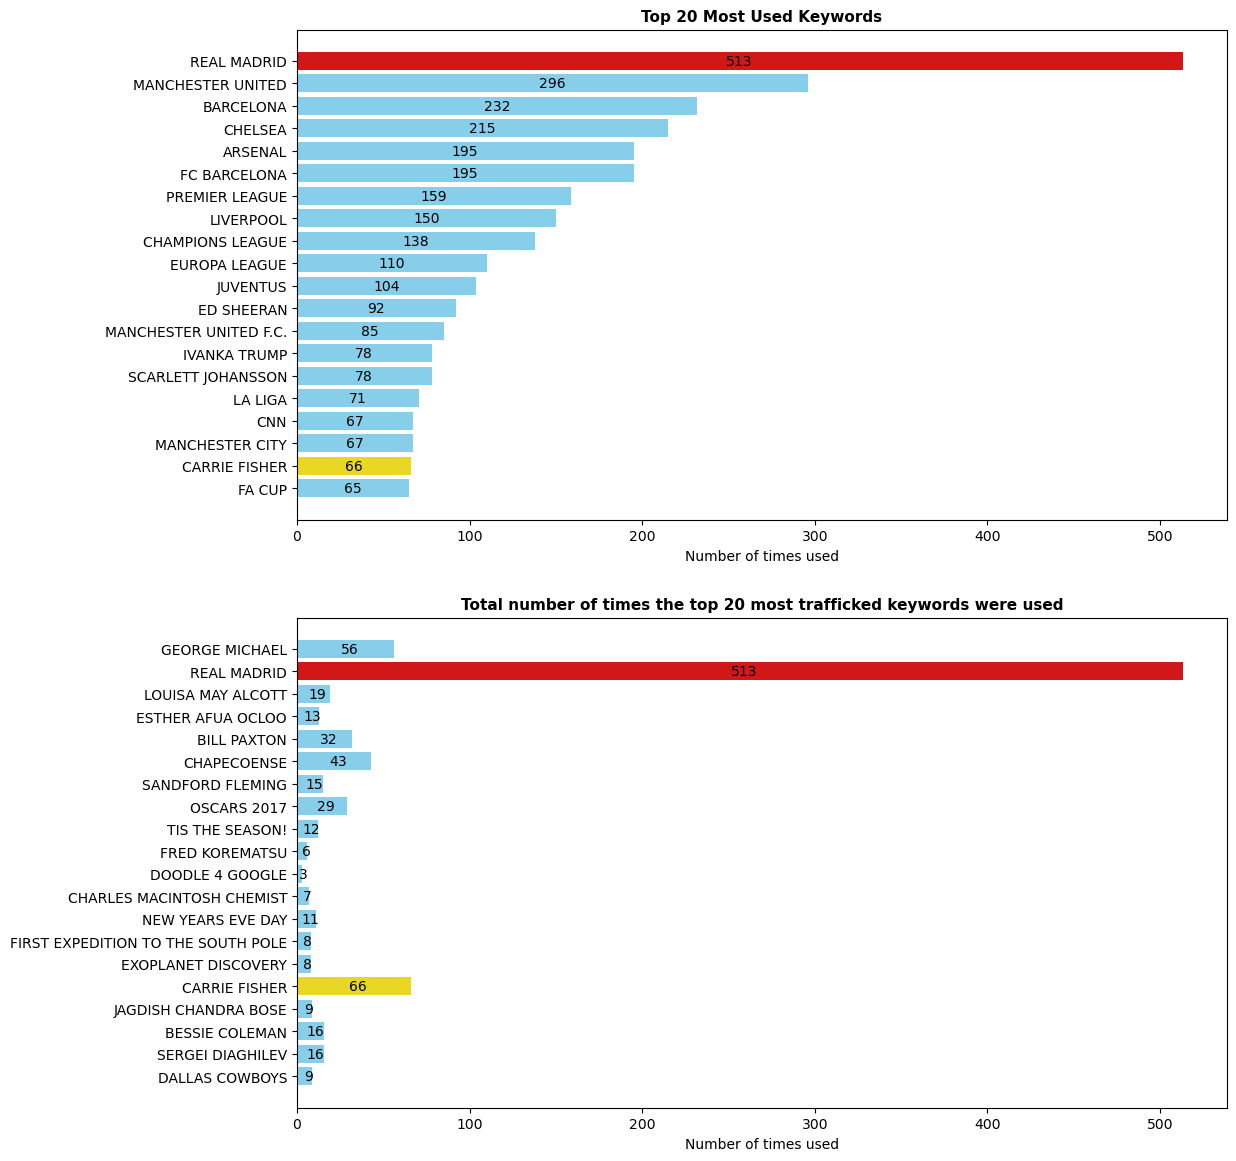

In [27]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(12, 14))

colors=['#d11717', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#e8d823', '#87CEEB']
colors2=['#87CEEB', '#d11717', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#e8d823', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB']

# Plot the data to each axis and add colors, titles and lables
ax1.barh(*zip(*most_used_keywords.items()));
ax1.invert_yaxis()
ax1.bar_label(ax1.containers[0], 
              label_type='center')
ax1.set_title('Top 20 Most Used Keywords', 
              fontweight='bold', 
              fontsize=11)
ax1.set_xlabel('Number of times used')
for patch,color in zip(ax1.patches,colors):
    patch.set_facecolor(color)

ax2.barh(*zip(*times_used_keywords_highest_traffic.items()), 
         color='skyblue');
ax2.invert_yaxis()
ax2.bar_label(ax2.containers[0], 
              label_type='center', 
              padding= 3)
ax2.set_title('Total number of times the top 20 most trafficked keywords were used', 
              fontweight='bold', 
              fontsize=11)
ax2.set_xlabel('Number of times used')
ax2.ticklabel_format(style='plain', 
                     axis='x')
for patch,color in zip(ax2.patches,colors2):
    patch.set_facecolor(color)

###  Graphs Analysis

These two graphs show that of the top 20 keywords with the highest traffic in the entire DataFrame, none has been used more than 100 times in total except for **REAL MADRID**. The average number of times these keywords were used is 44.55. On the contrary, in the case of the top 20 most used keywords in the DataFrame, half of them have been used more than 100 times and the average number of times they have been used is 148.8.

To confirm this analysis, the comparison between the top 20 most used keywords and the top 20 keywords with the highest traffic will be performed below for the top 3 countries with the highest total traffic of the entire DataFrame: USA, India and UK.

In [28]:
# Create a variable to store the top 3 countries with the most traffic
traffic_per_country = df_news_temp.groupby(['country'])['traffic'].sum()
traffic_per_country_sorted = traffic_per_country.sort_values(ascending=False).head(3)
traffic_per_country_sorted

country
USA      526760000
India    154290000
UK       146870000
Name: traffic, dtype: int64

## Check for correlation between keywords and traffic in the USA

In [29]:
# Create a new DataFrame with entries from USA only.
df_news_usa = df_news_temp.loc[df_news_temp['country'] == 'USA']
df_news_usa.head()

,dayId,country,type,title,date,keywords,traffic,publishDate,relatedKeyword,newsTitle,newsSource,newsSnippet,newsLink
70141,2016-11-28,USA,Top Keywords,Top Keywords USA 20161128,2016-11-28,AMERICAN EAGLE,500000,"Mon, 28 Nov 2016 14:00:00 -0800",NaN,"American Eagle Outfitters' (AEO) ""Buy"" Rating ...",The Cerbat Gem,American Eagle Outfitters logo American Eagle ...,https://www.thecerbatgem.com/2016/11/28/americ...
70142,2016-11-28,USA,Top Keywords,Top Keywords USA 20161128,2016-11-28,DICKS SPORTING GOODS,200000,"Mon, 28 Nov 2016 18:00:00 -0800",NaN,Dick's Sporting Goods acquires mobile scorekee...,TechCrunch,Dick's Sporting Goods is expanding its digital...,https://techcrunch.com/2016/11/28/dicks-sporti...
70143,2016-11-28,USA,Top Keywords,Top Keywords USA 20161128,2016-11-28,DIRECTV NOW,100000,"Mon, 28 Nov 2016 13:00:00 -0800",NaN,"AT&T Appeals to Cord-Cutters With DirecTV Now,...",New York Times,"The service, DirecTV Now, includes many of the...",http://www.nytimes.com/2016/11/28/business/med...
70144,2016-11-28,USA,Top Keywords,Top Keywords USA 20161128,2016-11-28,EAGLES,200000,"Mon, 28 Nov 2016 21:00:00 -0800","Eagles Score, Carson Wentz",Eagles bog down in loss to Packers,USA TODAY,PHILADELPHIA - The Eagles saw their playoff ho...,http://www.usatoday.com/story/sports/nfl/eagle...
70145,2016-11-28,USA,Top Keywords,Top Keywords USA 20161128,2016-11-28,EXPRESS,200000,"Mon, 28 Nov 2016 16:00:00 -0800",NaN,Asmodee Digital Launches Colt Express on Mobile,SocialTimes,Asmodee Digital announced the release of Colt ...,http://www.adweek.com/socialtimes/asmodee-digi...


In [30]:
# Create a dictionary with the most used keywords in the USA and the number of times they have been used
most_used_keywords_usa = dict(df_news_usa.keywords.value_counts().head(20))
most_used_keywords_usa

{'REAL MADRID': 18,
 'WARRIORS': 16,
 'CAVS': 15,
 'FC BARCELONA': 13,
 'SCHOOL CLOSINGS': 9,
 'AMBER ALERT': 8,
 'KODAK BLACK': 7,
 'DUKE BASKETBALL': 7,
 'SPURS': 7,
 'ARSENAL': 7,
 'TOMI LAHREN': 7,
 'RUSSELL WESTBROOK': 6,
 'SELENA': 6,
 'ISAIAH THOMAS': 6,
 'SYRACUSE BASKETBALL': 5,
 'DOW JONES': 5,
 'NORTH KOREA': 5,
 'TONY ROMO': 5,
 'PREMIER LEAGUE': 5,
 'KELLYANNE CONWAY': 5}

In [31]:
# Create a dictionary with the keywords with highest traffic in the USA
keywords_highest_traffic_usa = df_news_usa.groupby(['keywords'])['traffic'].sum()
keywords_highest_traffic_usa_sorted = dict(keywords_highest_traffic_usa.sort_values(ascending=False).head(20))
keywords_highest_traffic_usa_sorted

{'GEORGE MICHAEL': 10600000,
 'DOODLE 4 GOOGLE': 10000000,
 'BILL PAXTON': 10000000,
 'FRED KOREMATSU': 10000000,
 'ESTHER AFUA OCLOO': 10000000,
 'OSCARS 2017': 10000000,
 'DALLAS COWBOYS': 6200000,
 'GREEN BAY PACKERS': 6200000,
 'AARON HERNANDEZ': 5570000,
 'LADY GAGA': 5050000,
 'SANTA TRACKER': 5050000,
 'NFL PLAYOFFS 2017': 5000000,
 'GRAMMYS 2017': 5000000,
 'CHARLIE MURPHY': 5000000,
 'FIRST DAY OF WINTER': 5000000,
 'ALABAMA VS CLEMSON': 5000000,
 'GOLDEN GLOBES 2017': 5000000,
 'REAL MADRID': 3250000,
 'PATRIOTS': 3200000,
 'WARRIORS': 3150000}

In [32]:
# Check if there are keywords that are in both 'most_used_keywords_usa' and 'keywords_highest_traffic_usa_sorted' dictionaries.
most_used_keywords_usa_set = set(most_used_keywords_usa)
keywords_highest_traffic_usa_sorted_set = set(keywords_highest_traffic_usa_sorted)
print(most_used_keywords_usa_set.intersection(keywords_highest_traffic_usa_sorted_set))

{'WARRIORS', 'REAL MADRID'}


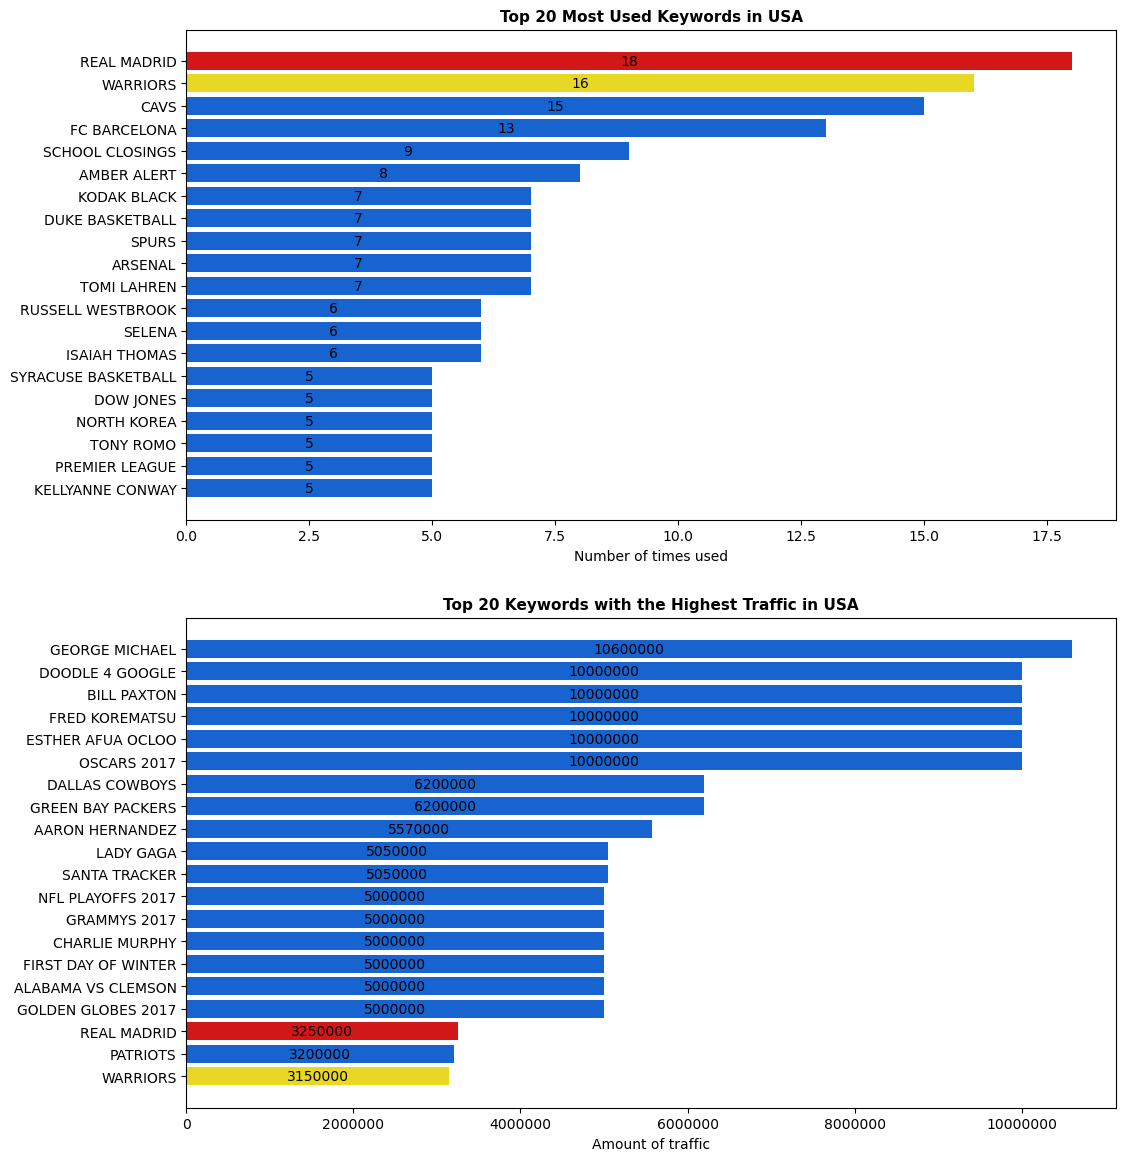

In [33]:
# Create two subplots to visualise the difference between the top 20 most used keywords in the USA and the top 20 keywords with the highest traffic in the USA.
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(12, 14))

colors=['#d11717', '#e8d823', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1']
colors2=['#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#d11717', '#1764d1', '#e8d823']

# Plot the data to each axis and add colors, titles and lables
ax1.barh(*zip(*most_used_keywords_usa.items()))
ax1.invert_yaxis();
ax1.bar_label(ax1.containers[0], 
              label_type='center')
ax1.set_title('Top 20 Most Used Keywords in USA', 
              fontweight='bold', 
              fontsize=11)
ax1.set_xlabel('Number of times used')
for patch,color in zip(ax1.patches,colors):
    patch.set_facecolor(color)


ax2.barh(*zip(*keywords_highest_traffic_usa_sorted.items()));
ax2.invert_yaxis();
ax2.bar_label(ax2.containers[0], 
              label_type='center', 
              fmt = '%d');
ax2.set_title('Top 20 Keywords with the Highest Traffic in USA', 
              fontweight='bold', 
              fontsize=11)
ax2.set_xlabel('Amount of traffic')
plt.ticklabel_format(style='plain', 
                     axis='x')
for patch,color in zip(ax2.patches,colors2):
    patch.set_facecolor(color)

### Graphs Analysis

As can be seen in both graphs, the same situation is repeated, where only 2 keywords, in this case **REAL MADRID** and **WARRIORS**, are repeated in both the top 20 most used keywords in the USA and in the top 20 keywords with the highest traffic in the USA, reinforcing the hypothesis that there is no correlation between keywords and traffic.

## Check for correlation between keywords and traffic in India

In [34]:
# Create a new DataFrame with entries from India only.
df_news_india = df_news_temp.loc[df_news_temp['country'] == 'India']
df_news_india.head()

,dayId,country,type,title,date,keywords,traffic,publishDate,relatedKeyword,newsTitle,newsSource,newsSnippet,newsLink
30928,2016-11-29,India,Top Keywords,Top Keywords India 20161129,2016-11-29,AAMIR KHAN,20000,"Tue, 29 Nov 2016 21:30:00 +0530",NaN,Aamir Khan's Fat-to-Fit pictures for Dangal in...,The Indian Express,With Dangal all set to release in less than a ...,http://indianexpress.com/article/trending/tren...
30929,2016-11-29,India,Top Keywords,Top Keywords India 20161129,2016-11-29,BRAZIL FOOTBALL TEAM,200000,"Tue, 29 Nov 2016 13:30:00 +0530","Plane Crash, Chapecoense, Brazil Plane Crash, ...",Plane carrying Brazilian football team crashes...,Mirror.co.uk,A plane carrying a South American football tea...,http://www.mirror.co.uk/news/world-news/plane-...
30930,2016-11-29,India,Top Keywords,Top Keywords India 20161129,2016-11-29,ELECTION RESULTS,10000,"Tue, 29 Nov 2016 05:30:00 +0530",NaN,Are We Done Talking About The Election Results...,MTV.com,"The election is over, but it seems like Americ...",http://www.mtv.com/news/2958114/are-we-done-ta...
30931,2016-11-29,India,Top Keywords,Top Keywords India 20161129,2016-11-29,LOUISA MAY ALCOTT,5000000,"Tue, 29 Nov 2016 00:30:00 +0530","Little Women, Louisa May Alcott Books",Louisa May Alcott on Little Women: “I grow tir...,Vox,"Louisa May Alcott, whose 184th birthday is the...",http://www.vox.com/culture/2016/11/29/13763644...
30932,2016-11-29,India,Top Keywords,Top Keywords India 20161129,2016-11-29,PARTHIV PATEL,20000,"Tue, 29 Nov 2016 17:30:00 +0530",NaN,Parthiv Patel as back-up opener? That's a good...,The Indian Express,Parthiv Patel's positive batting with scores o...,http://indianexpress.com/article/sports/cricke...


In [35]:
# Create a dictionary with the most used keywords in India and the number of times it has been used
most_used_keywords_india = dict(df_news_india.keywords.value_counts().head(20))
most_used_keywords_india

{'REAL MADRID': 17,
 'FC BARCELONA': 17,
 'MANCHESTER UNITED': 15,
 'CHELSEA': 14,
 'ARSENAL': 13,
 'MANCHESTER UNITED F.C.': 10,
 'LIVERPOOL': 9,
 'BARCELONA': 9,
 'CRICINFO': 7,
 'NEWS 7': 5,
 'CRICBUZZ': 5,
 'IBPS': 5,
 'CRICKET SCORE': 4,
 'NOKIA 8': 4,
 'KAATRU VELIYIDAI': 4,
 'AAJ TAK': 4,
 'ZEE NEWS': 4,
 'MOTO G5': 3,
 'PRIYA SACHDEV': 3,
 'BABA RAMDEV': 3}

In [36]:
# Create a dictionary with the keywords with highest traffic in India
keywords_highest_traffic_india = df_news_india.groupby(['keywords'])['traffic'].sum()
keywords_highest_traffic_india_sorted = dict(keywords_highest_traffic_india.sort_values(ascending=False).head(20))
keywords_highest_traffic_india_sorted

{'LOUISA MAY ALCOTT': 5000000,
 'EXOPLANET DISCOVERY': 5000000,
 'JAGDISH CHANDRA BOSE': 5000000,
 'TIS THE SEASON!': 5000000,
 'NOWRUZ': 5000000,
 'RAJKUMAR': 5000000,
 'NEW YEARS EVE DAY': 5000000,
 'CHARLES MACINTOSH CHEMIST': 5000000,
 'WHEN WAS THE FIRST CRICKET TEST MATCH': 5000000,
 'FIRST EXPEDITION TO THE SOUTH POLE': 5000000,
 'SANDFORD FLEMING': 5000000,
 'JAMINI ROY': 5000000,
 'CRICBUZZ': 4500000,
 'CRICKET SCORE': 3550000,
 'INDIA VS ENGLAND': 2500000,
 'VINOD KHANNA': 2200000,
 'BMC ELECTION 2017': 2050000,
 'IPL 2017': 2050000,
 'HOLI FESTIVAL': 2020000,
 'INDIA UNION BUDGET 2017': 2000000}

In [37]:
# Check if there are keywords that are in both 'most_used_keywords_india' and 'keywords_highest_traffic_india_sorted' dictionaries.
most_used_keywords_india_set = set(most_used_keywords_india)
keywords_highest_traffic_india_sorted_set = set(keywords_highest_traffic_india_sorted)
print(most_used_keywords_india_set.intersection(keywords_highest_traffic_india_sorted_set))

{'CRICBUZZ', 'CRICKET SCORE'}


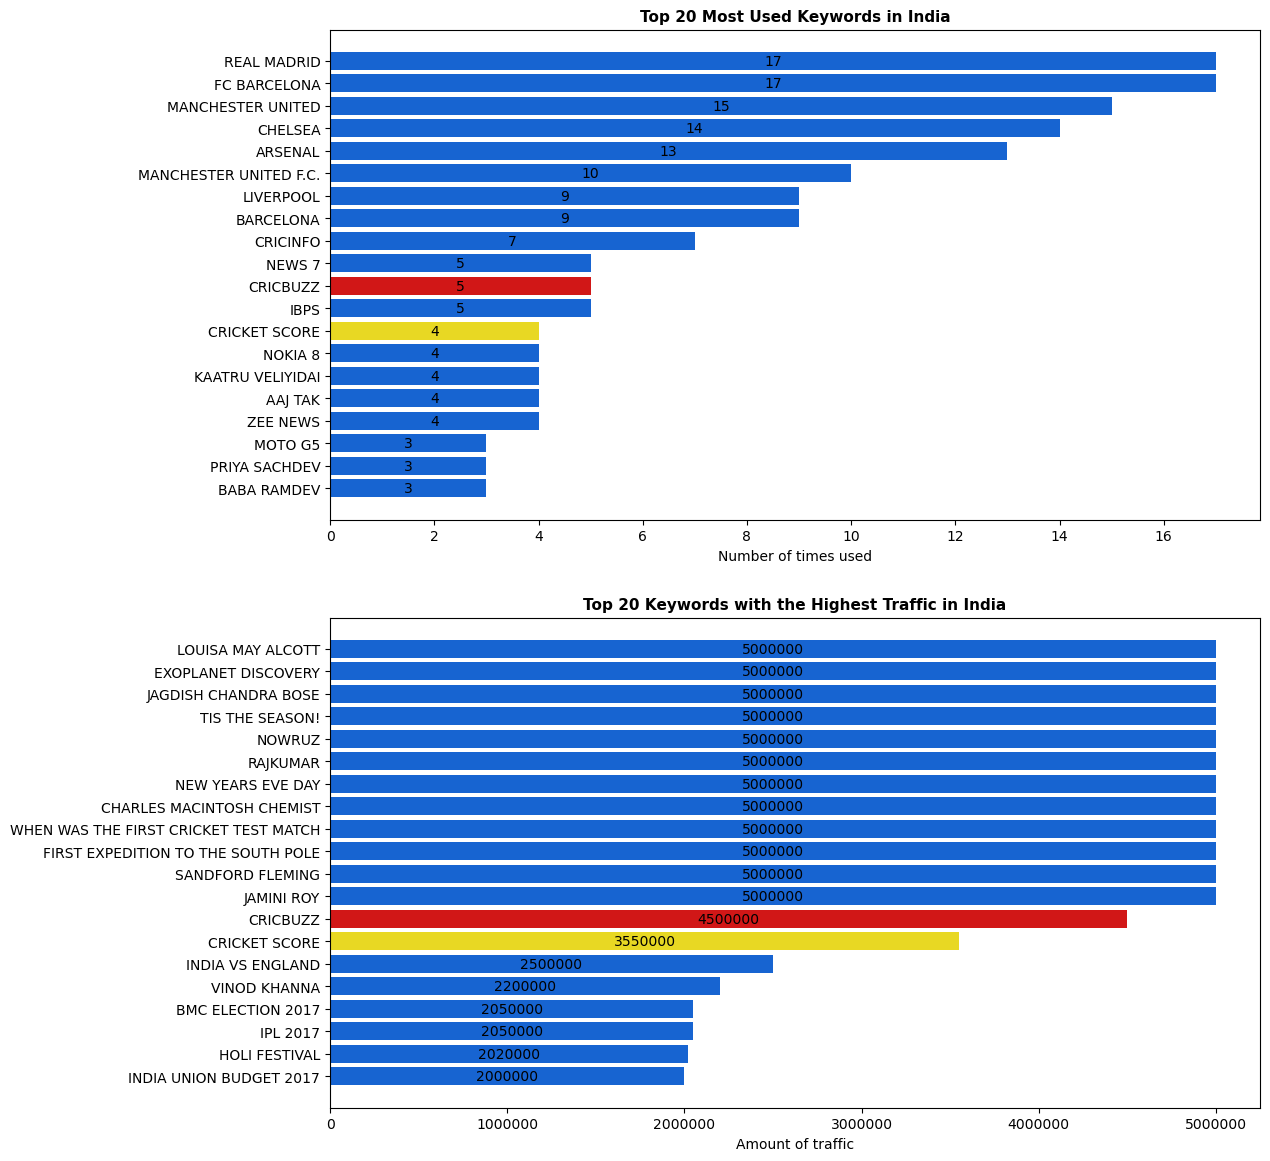

In [38]:
# Create two subplots to visualise the difference between the top 20 most used keywords in India and the top 20 keywords with the highest traffic in India.
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(12, 14))

colors=['#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#d11717', '#1764d1', '#e8d823', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1']
colors2=['#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#d11717', '#e8d823', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1']

# Plot the data to each axis and add colors, titles and lables
ax1.barh(*zip(*most_used_keywords_india.items()))
ax1.invert_yaxis();
ax1.bar_label(ax1.containers[0], 
              label_type='center')
ax1.set_title('Top 20 Most Used Keywords in India', 
              fontweight='bold', 
              fontsize=11)
ax1.set_xlabel('Number of times used')
for patch,color in zip(ax1.patches,colors):
    patch.set_facecolor(color)


ax2.barh(*zip(*keywords_highest_traffic_india_sorted.items()));
ax2.invert_yaxis();
ax2.bar_label(ax2.containers[0], 
              label_type='center', 
              fmt = '%d');
ax2.set_title('Top 20 Keywords with the Highest Traffic in India', 
              fontweight='bold', 
              fontsize=11)
ax2.set_xlabel('Amount of traffic')
plt.ticklabel_format(style='plain', 
                     axis='x')
for patch,color in zip(ax2.patches,colors2):
    patch.set_facecolor(color)

###  Graphs Analysis

One more time the situation is repeated, where only 2 keywords, in this case **CRICBUZZ** and **CRICKET SCORE**, are repeated both in the top 20 most used keywords in India and in the top 20 keywords with the highest traffic in India. 

## Check for correlation between keywords and traffic in UK

In [39]:
# Create a new DataFrame with entries from UK only.
df_news_uk = df_news_temp.loc[df_news_temp['country'] == 'UK']
df_news_uk.head()

,dayId,country,type,title,date,keywords,traffic,publishDate,relatedKeyword,newsTitle,newsSource,newsSnippet,newsLink
67683,2016-11-28,UK,Top Keywords,Top Keywords UK 20161128,2016-11-28,BARRY BENNELL,50000,"Mon, 28 Nov 2016 17:00:00 +0000",NaN,Barry Bennell in hospital after being found un...,BBC News,"Ex-youth football coach Barry Bennell, who is ...",http://www.bbc.co.uk/news/uk-38134941
67684,2016-11-28,UK,Top Keywords,Top Keywords UK 20161128,2016-11-28,ED BALLS,20000,"Mon, 28 Nov 2016 19:00:00 +0000",NaN,Ed Balls has won over Strictly fans. Will he s...,Telegraph.co.uk,At that time it was beginning to dawn on me th...,http://www.telegraph.co.uk/news/2016/11/28/ed-...
67685,2016-11-28,UK,Top Keywords,Top Keywords UK 20161128,2016-11-28,LISA SNOWDON,200000,"Mon, 28 Nov 2016 19:00:00 +0000","Carol Vorderman, Sam Quek",I'm A Celeb's Lisa Snowdon reveals heartbreaki...,Mirror.co.uk,I'm A Celebrity star Lisa Snowdon is at peace ...,http://www.mirror.co.uk/tv/tv-news/im-celebs-l...
67686,2016-11-28,UK,Top Keywords,Top Keywords UK 20161128,2016-11-28,OLIVIA BENTLEY,20000,"Mon, 28 Nov 2016 16:00:00 +0000",NaN,Made In Chelsea's Olivia Bentley filmed snorti...,Daily Mail,Made In Chelsea star Olivia Bentley has been f...,http://www.dailymail.co.uk/tvshowbiz/article-3...
67687,2016-11-28,UK,Top Keywords,Top Keywords UK 20161128,2016-11-28,PAUL NUTTALL,20000,"Mon, 28 Nov 2016 13:00:00 +0000",NaN,New Ukip leader Paul Nuttall plans 'to replace...,The Guardian,"The new leader of Ukip, Paul Nuttall, has said...",https://www.theguardian.com/politics/2016/nov/...


In [40]:
# Create a dictionary with the most used keywords in the UK and the number of times it has been used
most_used_keywords_uk = dict(df_news_uk.keywords.value_counts().head(20))
most_used_keywords_uk

{'REAL MADRID': 21,
 'CHELSEA': 17,
 'NEWCASTLE UNITED': 16,
 'TOTTENHAM': 13,
 'LEEDS UNITED': 13,
 'MANCHESTER UNITED': 13,
 'LIVERPOOL': 12,
 'ARSENAL': 11,
 'BARCELONA': 11,
 'MAN CITY': 11,
 'LEICESTER CITY': 10,
 'EVERTON': 9,
 'MANCHESTER UNITED F.C.': 9,
 'RANGERS': 8,
 'PREMIER LEAGUE': 7,
 'MADELEINE MCCANN': 7,
 'BT SPORT': 7,
 'RONNIE O SULLIVAN': 6,
 'MAN UTD': 6,
 'EMMA WILLIS': 6}

In [41]:
# Create a dictionary with the keywords with highest traffic in the UK
keywords_highest_traffic_uk = df_news_uk.groupby(['keywords'])['traffic'].sum()
keywords_highest_traffic_uk_sorted = dict(keywords_highest_traffic_uk.sort_values(ascending=False).head(20))
keywords_highest_traffic_uk_sorted

{'NEWS': 2100000,
 'ABDUL SATTAR EDHI': 2000000,
 'EXOPLANET DISCOVERY': 2000000,
 'FIRST EXPEDITION TO THE SOUTH POLE': 2000000,
 'STEVE BIKO': 2000000,
 'MOTHER S DAY': 2000000,
 'SERGEI DIAGHILEV': 2000000,
 'ESTHER AFUA OCLOO': 2000000,
 'SANDFORD FLEMING': 2000000,
 'TIS THE SEASON!': 2000000,
 'BBC NEWS': 2000000,
 'CHARLES MACINTOSH CHEMIST': 2000000,
 'FAZLUR RAHMAN KHAN': 2000000,
 'ST. GEORGE S DAY': 2000000,
 'NEW YEAR S DAY 2017': 2000000,
 'LOUISA MAY ALCOTT': 2000000,
 'ST. ANDREW S DAY': 2000000,
 'CARMEN MIRANDA': 2000000,
 'SPRING EQUINOX 2017': 2000000,
 'HOLI FESTIVAL': 2000000}

In [42]:
# Check if there are keywords that are in both 'most_used_keywords_uk' and 'keywords_highest_traffic_uk_sorted' dictionaries.
most_used_keywords_uk_set = set(most_used_keywords_uk)
keywords_highest_traffic_uk_sorted_set = set(keywords_highest_traffic_uk_sorted)
print(most_used_keywords_uk_set.intersection(keywords_highest_traffic_uk_sorted_set))

set()


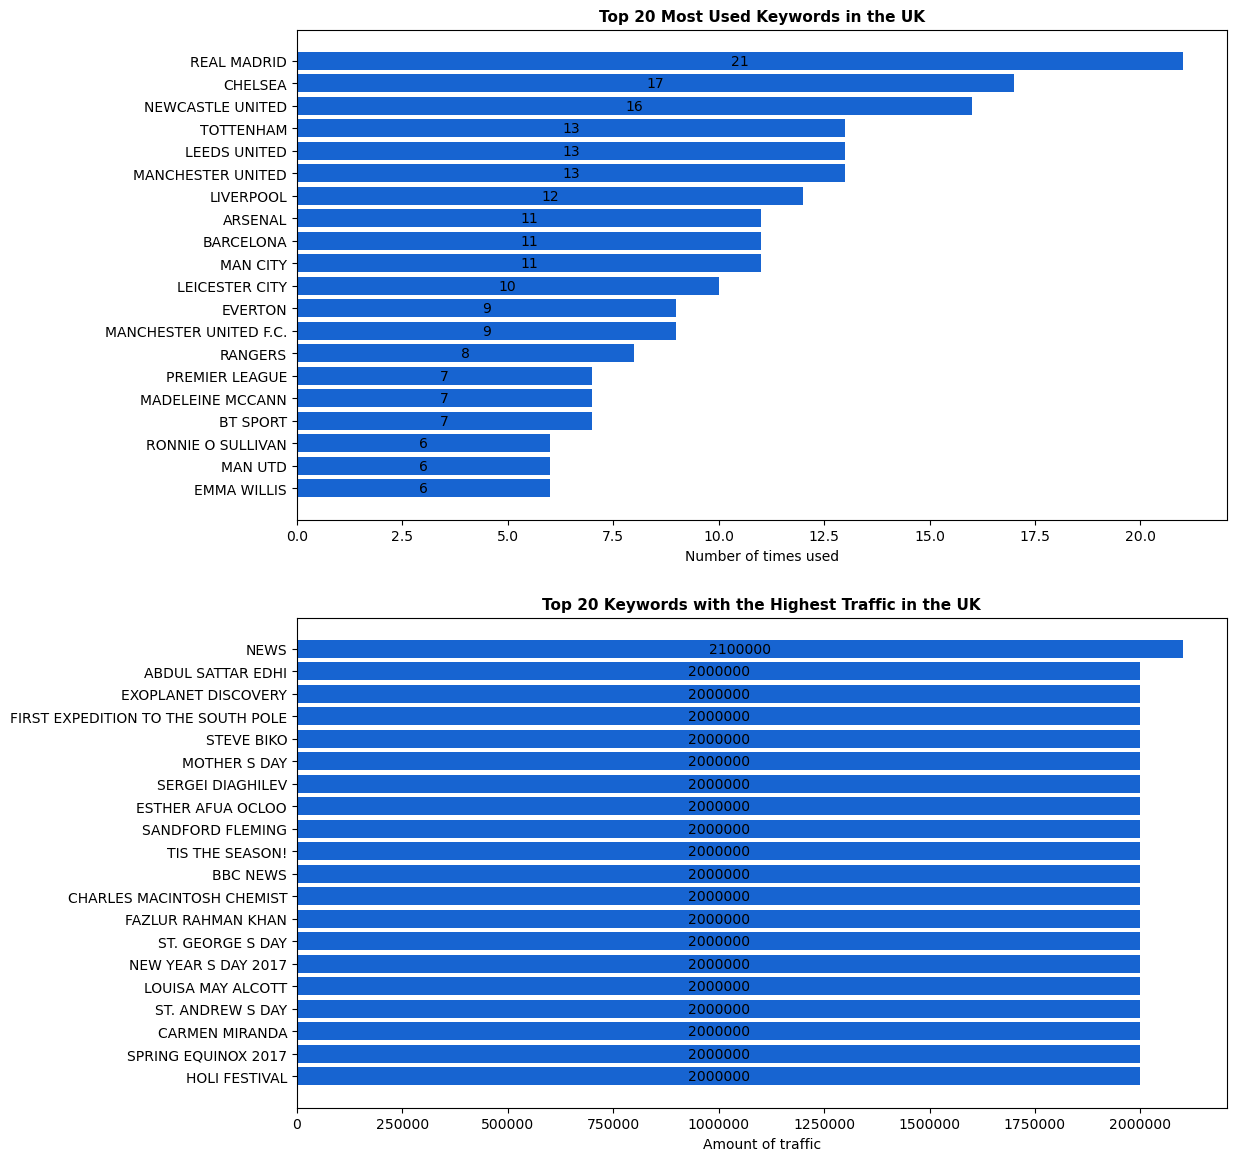

In [43]:
# Create two subplots to visualise the difference between the top 20 most used keywords in the UK and the top 20 keywords with the highest traffic in the UK.
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(12, 14))

colors=['#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1']
colors2=['#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1', '#1764d1']

# Plot the data to each axis and add colors, titles and lables
ax1.barh(*zip(*most_used_keywords_uk.items()))
ax1.invert_yaxis();
ax1.bar_label(ax1.containers[0], 
              label_type='center')
ax1.set_title('Top 20 Most Used Keywords in the UK', 
              fontweight='bold', 
              fontsize=11)
ax1.set_xlabel('Number of times used')
for patch,color in zip(ax1.patches,colors):
    patch.set_facecolor(color)


ax2.barh(*zip(*keywords_highest_traffic_uk_sorted.items()));
ax2.invert_yaxis();
ax2.bar_label(ax2.containers[0], 
              label_type='center', 
              fmt = '%d');
ax2.set_title('Top 20 Keywords with the Highest Traffic in the UK', 
              fontweight='bold', 
              fontsize=11)
ax2.set_xlabel('Amount of traffic')
plt.ticklabel_format(style='plain', 
                     axis='x')
for patch,color in zip(ax2.patches,colors2):
    patch.set_facecolor(color)

### Graphs Analysis

In the case of the UK, none of the keywords are repeated in either graphs, which together with the previous analysis concludes that there is no correlation between keywords and traffic.

# Other Insights

## Total traffic by country

In [44]:
# Create a DataFrame to plot the traffic per country
traffic_per_country = df_news_temp.groupby(['country'], as_index=False)['traffic'].sum()
traffic_per_country = (traffic_per_country.sort_values('traffic', ascending=False)).reset_index(drop=True)
traffic_per_country.head(10)


,country,traffic
0,USA,526760000
1,India,154290000
2,UK,146870000
3,Brazil,131345000
4,Italy,113480000
5,Japan,101560000
6,France,99995000
7,Germany,80875000
8,Canada,63950000
9,Mexico,54285000


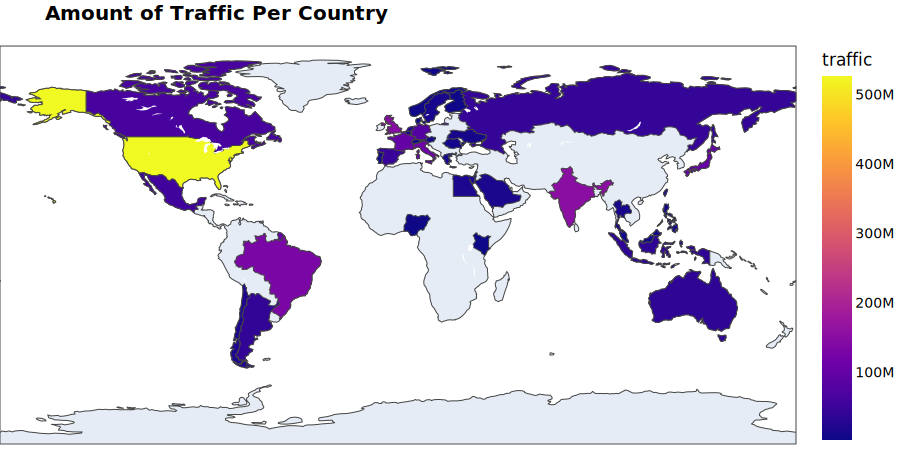

In [45]:
# Create a heat map to show the traffic per country.
fig = px.choropleth(traffic_per_country,
                    locations='country',
                    locationmode='country names',
                    color='traffic', 
                    scope='world', 
                    title='Amount of Traffic Per Country')

fig.update_layout(title='<b>Amount of Traffic Per Country</b>',
                  font=dict(size=14, color="black"),
                  margin=dict(l=0, r=0, b=0, t=40), 
                  width=900, 
                  height=450)

fig.show()

NB: Hovering over the upper right corner of the heat map reveals buttons to reset the map to the initial position and to manipulate it in various ways.

### Heat map Analysis

As shown, the **USA** is the country with the highest traffic, having an important difference of approximately **372.000.000** compare to **India**, which ranks second. 
From this visualisation, we can establish that the amount of population is not a determining factor in regards with the traffic since India has a population 4 times larger than the USA but a smaller amount of traffic.

## Traffic per news source

In [46]:
# Create a a DataFrame with the highest traffic per news source and country, showing the percentage of total traffic.
newsSource_with_higest_traffic = df_news_temp.groupby(['country', 'newsSource'], as_index=False)['traffic'].sum()
newsSource_with_higest_traffic = (newsSource_with_higest_traffic.sort_values('traffic', ascending=False)).reset_index(drop=True)
newsSource_with_higest_traffic['% of total traffic'] = ((newsSource_with_higest_traffic['traffic'] / newsSource_with_higest_traffic['traffic'].sum()) * 100).round(2)
newsSource_with_higest_traffic = newsSource_with_higest_traffic.head(10)
newsSource_with_higest_traffic

,country,newsSource,traffic,% of total traffic
0,USA,New York Times,78490000,4.10
1,USA,USA TODAY,33370000,1.74
2,Brazil,Globo.com,30465000,1.59
3,India,The Indian Express,27940000,1.46
4,USA,Washington Post,25000000,1.30
5,USA,TIME,20730000,1.08
6,UK,The Guardian,19760000,1.03
7,USA,Los Angeles Times,17070000,0.89
8,UK,Telegraph.co.uk,16000000,0.83
9,USA,SB Nation,15360000,0.80


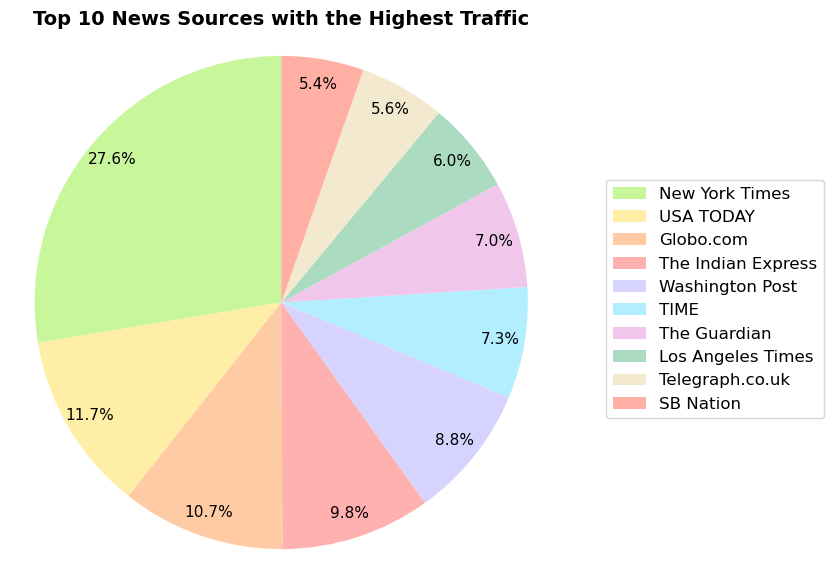

In [47]:
# Create a pie plot to show the top 10 news source with the highest traffic.
plt.style.use("default")
colors1 = ['#C8F69B', '#FFEEA5', '#FFCBA5', '#FFB1AF', '#D6D4FF', '#B3EEFF', '#F0C7EA', '#ABDBC1', '#F2E9CE', '#FFAFA3', '#6C7394']
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the data and add colors, titles and lables.
ax.pie(x=newsSource_with_higest_traffic['traffic'],
       labels=None,
       labeldistance=.82,
       autopct='%1.1f%%',
       textprops={"fontsize": 11},
       shadow=False, 
       startangle=90, 
       pctdistance=0.9,
       colors=colors1)

ax.axis("equal") 

ax.legend(labels=newsSource_with_higest_traffic['newsSource'], 
          bbox_to_anchor=(1.3,0.5), 
          loc="center right", 
          fontsize=12, 
          bbox_transform=plt.gcf().transFigure)

ax.set_title('Top 10 News Sources with the Highest Traffic', weight="bold", size=14)

plt.show()

### Pie chart Analysis

The pie chart shows the top 10 media sources with the highest traffic in the entire DataFrame. 6 of themm belong to the USA, 2 to the UK, 1 to Brazil, and 1 to India.
The New York Times is by far the news source with the highest traffic in the entire DataFrame with 4.1% of the total traffic, whereas none of the remaining 9 news sources exceeds 2%.